In [1]:
%load_ext autoreload
%autoreload 

In [2]:
import math
from types import SimpleNamespace

from clip_sdf import clip_sdf_optimization, generate_visualizations

ClipLoss device cuda


In [3]:
 optim_config = SimpleNamespace(
    learning_rate=0.01,
    batch_size=4,
    init_tolerance=-1,
    iters_per_res=20,
    max_iters_per_cam=32,
    camera=SimpleNamespace(
        max_num_cameras=8,
        init_num_cameras=8,
        mapping_span=2 * math.pi,
        shuffle_order=False,
        mapping_type="linear", # manual | sdfdiff
    ),
    loss=SimpleNamespace(
        image_loss_weight=1 / 5000,
        sdf_loss_weight=1 / 1000,
        lp_loss_weight=1 / 1000,
    ),
)    




image loss:  tensor(-4.9805, device='cuda:0', dtype=torch.float16, grad_fn=<MulBackward0>)
image weight:  tensor(65536)

sdf loss:  tensor(8.4467, device='cuda:0', grad_fn=<MulBackward0>)
sdf weight:  tensor(262144)

lp loss:  tensor(0.1929, device='cuda:0', grad_fn=<MulBackward0>)
lp weight:  tensor(262144)

loss:  0

tolerance: -0.125

sdf grid res: 64  - iteration: 20  -  cam view idx 6  -  cam iters: 2



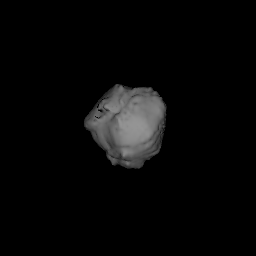

In [4]:
experiment_dir = clip_sdf_optimization(
    prompt="3D bunny rabbit mesh rendered with maya zbrush",
    optim_config=optim_config,
    experiment_name="test",
    sdf_grid_res_list=[8, 16, 24, 32, 40, 48, 56, 64],
)

In [5]:
# experiment_dir = "experiments/test-26"
generate_visualizations(experiment_dir)

Generating ./experiments/test-28/visualizations/generation.mp4


ffmpeg version 4.1.6-1~deb10u1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version='1~deb10u1' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --

Generating ./experiments/test-28/visualizations/visualization.mp4

----- END -----


ffmpeg version 4.1.6-1~deb10u1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 8 (Debian 8.3.0-6)
  configuration: --prefix=/usr --extra-version='1~deb10u1' --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --

In [6]:
import os
from IPython.display import Video

In [7]:
os.path.join(experiment_dir, "visualizations", 'generation.mp4')

'./experiments/test-28/visualizations/generation.mp4'

In [8]:
Video(os.path.join(experiment_dir, "visualizations", 'generation.mp4'))

In [9]:
Video(os.path.join(experiment_dir, "visualizations", 'visualization.mp4'))

In [10]:
import numpy as np

In [11]:
np.save('bunny_grid.npy', sdf_grid.detach().cpu().numpy())

NameError: name 'sdf_grid' is not defined